In [121]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Characterization of the flower species using their physical characteristics

In this proyect we are goint to use data file "iris_data.csv" that has been takes from the course. This database contains the characteristics of 
three different species of flowers. These characteristics are:
- The Sepal's length and width
- The Petal's length and width

The methodology for this database consist in analyse different characteristics in order to determine with high certainty the correct species.

In [193]:
filepath = "data/iris_data.csv"
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


First determine the structure of our data file:
- Determine the data base info
- Determine the number of rows
- Determine the columns name
- Determina the data type

In [218]:
# Determining the databse info 
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [194]:
# Determining the number of rows
print("Number of rows:",'\n', data.shape[0],'\n')
# Prointing the column's name
print("columns name:",'\n', data.columns.tolist(),'\n')
# Printing data types:
print("Data Types:",'\n',data.dtypes)

Number of rows: 
 150 

columns name: 
 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] 

Data Types: 
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [125]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Determining the statistical propierties as mean and median.

In [195]:
# Counting the total value of entries for each especies
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [196]:
ddes = data.describe()
ddes.loc['range'] = ddes.loc['max'] - ddes.loc['min']
out_f = ['mean', '50%', 'range']
ddes = ddes.loc[out_f]
ddes

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
50%,5.800000,3.000,4.350000,1.300000
range,3.600000,2.400,5.900000,2.400000


In [201]:
# Computing the mean and the median for each specie
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

Now, we take the sepal length and the petal length as our characteristics to determine the species. 
Fist, we show how they related each other, and its frequency:

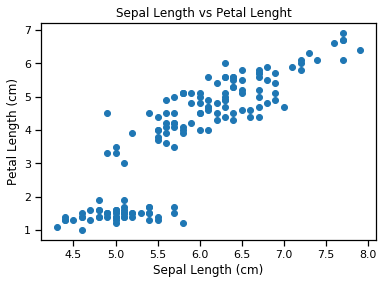

In [225]:
ax = plt.axes()

ax.scatter(data.sepal_length, data.petal_length)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Petal Length (cm)',
       title='Sepal Length vs Petal Lenght  ');


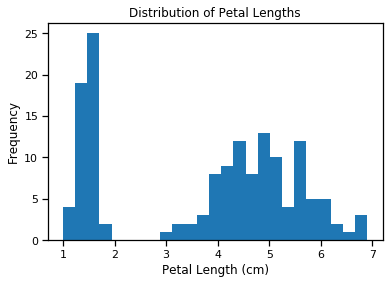

In [227]:
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');


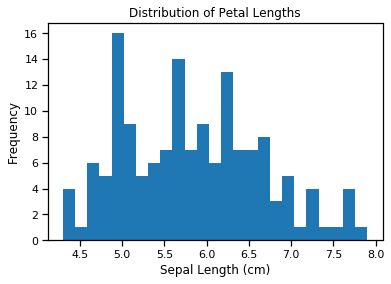

In [204]:
ax = data.sepal_length.plot.hist(bins=25)

ax.set(xlabel='Sepal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

In [205]:
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

Now, we are able to make our hipothesis:
- if the value of sepal lenght < 5.0 the specie is setosa
- if the value of the sepal width is  > 5.0 the specie is virginica 
- if the value of the sepal_leght > 5.0 and 4.0 < petal lengh < 5.0 the specie is versicolor. 

In [206]:
df1=data.copy()
df2=data.copy()

In [207]:
df1.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [208]:
df1 = data.loc[data['sepal_length'] <= 5.0,:]
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa


In [209]:
df1.species.value_counts()

setosa        28
versicolor     3
virginica      1
Name: species, dtype: int64

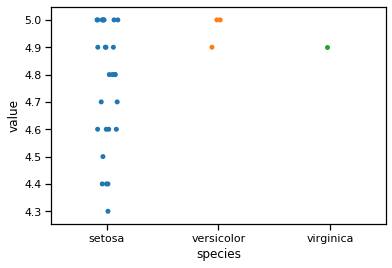

In [210]:
df_melt=pd.melt(df1, id_vars =['species'], value_vars =['sepal_length'])
sns.stripplot(x="species", y="value", data=df_melt)

Here, we can see that the sepal length allow to determine if the specie is setosa with probability of 87.5% 

In [211]:
#pd.get_dummies(data, columns=["species"]).head()

In [213]:
df2 = data.loc[data['petal_length'] <= 5.0,:]
df2 = df2.loc[data['petal_length'] >= 4.0,:]
df2.species.value_counts()

versicolor    38
virginica      9
Name: species, dtype: int64

In [214]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


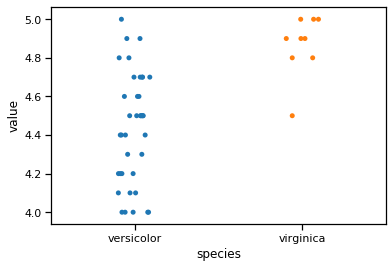

In [215]:
df2_melt=pd.melt(df2, id_vars =['species'], value_vars =['petal_length'])
sns.stripplot(x="species", y="value", data=df2_melt)

Here, we can see that Versicolor and Virginica species share similar characteristcs. Even in this case the petal length allows us to determine 
if the specie is Versicolor with probability of 87.5%. 

As a final comment, we saw during this test a good database. This, due to the fact that there were not outliers, also there was no missing information in the columns.